# Global Power Plant Database

# Problem Definition

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Data Loading and Description


`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

# Data Analysis

In [251]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [252]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Profiling

In [253]:
df.shape

(907, 27)

In [254]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [255]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [256]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [258]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [259]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [260]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Preprocessing

In [321]:
df.drop("country",axis=1,inplace=True)

In [322]:
df.drop("country_long",axis=1,inplace=True)

In [261]:
df.drop("latitude",axis=1,inplace=True)

In [262]:
df.drop("longitude",axis=1,inplace=True)

In [263]:
df.drop("other_fuel1",axis=1,inplace=True)

In [264]:
df.drop("other_fuel2",axis=1,inplace=True)

In [265]:
df.drop("other_fuel3",axis=1,inplace=True)

In [266]:
df.drop("commissioning_year",axis=1,inplace=True)

In [267]:
df.drop("owner",axis=1,inplace=True)

In [268]:
df.drop("geolocation_source",axis=1,inplace=True)

In [269]:
df.drop("wepp_id",axis=1,inplace=True)

In [270]:
df.drop("year_of_capacity_data",axis=1,inplace=True)

In [271]:
df.drop("generation_gwh_2013",axis=1,inplace=True)

In [272]:
df.drop("generation_gwh_2014",axis=1,inplace=True)

In [273]:
df.drop("generation_gwh_2015",axis=1,inplace=True)

In [274]:
df.drop("generation_gwh_2016",axis=1,inplace=True)

In [275]:
df.drop("generation_gwh_2017",axis=1,inplace=True)

In [276]:
df.drop("generation_gwh_2018",axis=1,inplace=True)

In [277]:
df.drop("generation_gwh_2019",axis=1,inplace=True)

In [278]:
df.drop("generation_data_source",axis=1,inplace=True)

In [279]:
df.drop("estimated_generation_gwh",axis=1,inplace=True)

In [323]:
df.head()

,name,gppd_idnr,capacity_mw,primary_fuel,source,url
0,0.0,657.0,2.5,6.0,109.0,128.0
1,1.0,519.0,98.0,1.0,174.0,173.0
2,2.0,853.0,39.2,7.0,21.0,205.0
3,3.0,0.0,135.0,2.0,22.0,58.0
4,4.0,1.0,1800.0,1.0,22.0,58.0


In [324]:
df.dtypes

name            float64
gppd_idnr       float64
capacity_mw     float64
primary_fuel    float64
source          float64
url             float64
dtype: object

# Making DataFrame for the Nominal Data

In [325]:
df_visualization_nominal=df[['name','gppd_idnr',"primary_fuel","source","url"]].copy()

In [326]:
df_visualization_nominal.columns

Index(['name', 'gppd_idnr', 'primary_fuel', 'source', 'url'], dtype='object')

# Visualization of the Data:

In [284]:
import seaborn as sns

Garacharma Solar Power Plant            1
Naini Solar Power Plant                 1
TANIR BAVI                              1
MUNIRABAD                               1
Shri Singaji MALWA TPP                  1
                                       ..
MANGLAM CEMENT                          1
Khirsara - Welspun Solar Power Plant    1
NIMBAHERA JK CEMENT                     1
SAGARDIGHI TPP                          1
NAGPUR GMT                              1
Name: name, Length: 907, dtype: int64


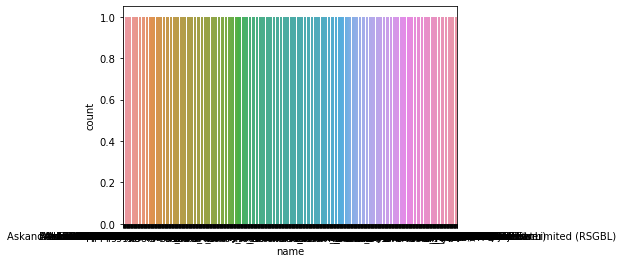

In [287]:
ax = sns.countplot(x='name', data=df_visualization_nominal)
print(df_visualization_nominal['name'].value_counts())

IND0000098    1
IND0000533    1
IND0000223    1
WRI1019943    1
IND0000464    1
             ..
IND0000103    1
WRI1026199    1
IND0000148    1
IND0000530    1
WRI1026794    1
Name: gppd_idnr, Length: 907, dtype: int64


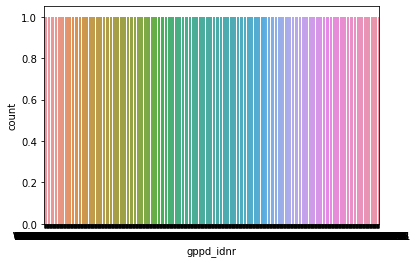

In [288]:
ax = sns.countplot(x='gppd_idnr', data=df_visualization_nominal)
print(df_visualization_nominal['gppd_idnr'].value_counts())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


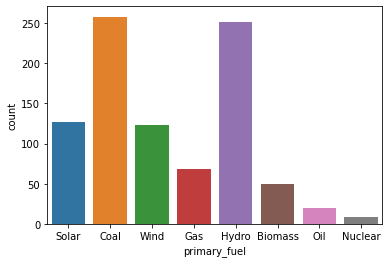

In [289]:
ax = sns.countplot(x='primary_fuel', data=df_visualization_nominal)
print(df_visualization_nominal['primary_fuel'].value_counts())

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
National Ltd nfl)                              1
Shri Vedganga ssk                              1
Power Private edM/Pdf                          1
Kesoram Industries ltd                         1
S Limited Rsolar                               1
Name: source, Length: 191, dtype: int64


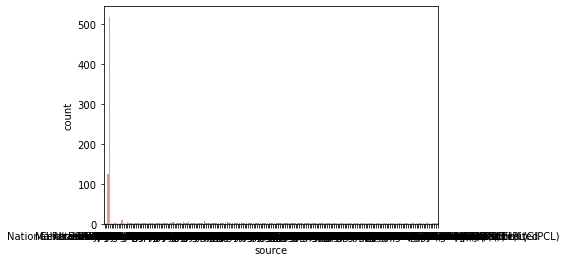

In [290]:
ax = sns.countplot(x='source', data=df_visualization_nominal)
print(df_visualization_nominal['source'].value_counts())

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
http://taxusgroup.com                                                                 1
https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853           1
https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1351077305.18/view                       1
https://cdm.unfccc.int/Projects/DB/KBS_Cert1356901378.31/view                         1
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1335362700.21/view                       1
Name: url, Length: 304, dtype: i

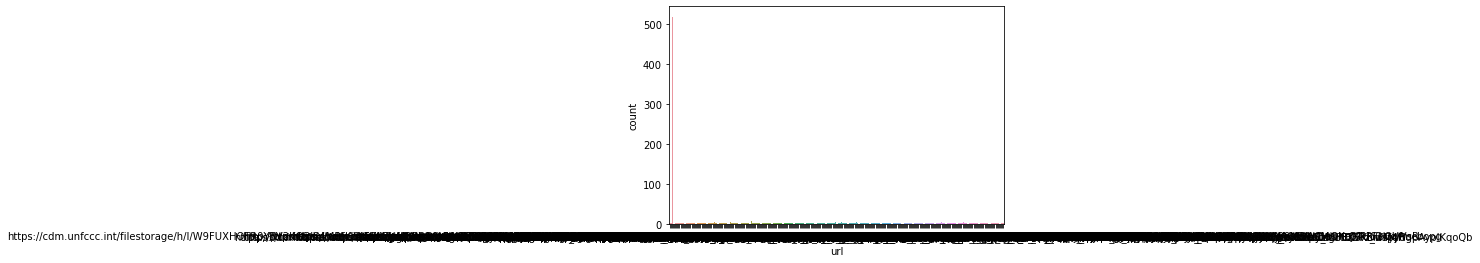

In [291]:
ax = sns.countplot(x='url', data=df_visualization_nominal)
print(df_visualization_nominal['url'].value_counts())

# Checking the distribution of the continuous value of the float type columns


In [292]:
df_visualization_continous=df[["capacity_mw"]]

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

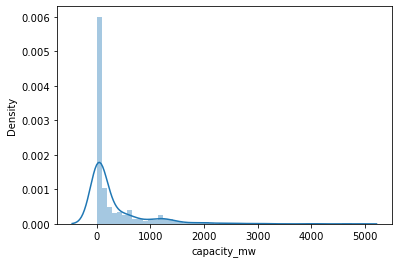

In [293]:
import seaborn as sns
sns.distplot(df_visualization_continous['capacity_mw'],kde=True)

# Encoding of DataFrame:

In [294]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [295]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [327]:
df

,name,gppd_idnr,capacity_mw,primary_fuel,source,url
0,0.0,657.0,2.5,6.0,109.0,128.0
1,1.0,519.0,98.0,1.0,174.0,173.0
2,2.0,853.0,39.2,7.0,21.0,205.0
3,3.0,0.0,135.0,2.0,22.0,58.0
4,4.0,1.0,1800.0,1.0,22.0,58.0
...,...,...,...,...,...,...
902,902.0,491.0,1600.0,1.0,22.0,58.0
903,903.0,822.0,3.0,6.0,77.0,22.0
904,904.0,891.0,25.5,7.0,21.0,260.0
905,905.0,539.0,80.0,1.0,59.0,82.0


# Describe the dataset:

In [328]:
df.describe()

,name,gppd_idnr,capacity_mw,primary_fuel,source,url
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,3.206174,43.847850,94.469680
std,261.972645,261.972645,590.085456,2.280652,44.642818,70.381222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.500000,226.500000,16.725000,1.000000,22.000000,58.000000
50%,453.000000,453.000000,59.200000,3.000000,22.000000,58.000000
75%,679.500000,679.500000,385.250000,6.000000,29.500000,115.500000
max,906.000000,906.000000,4760.000000,7.000000,190.000000,303.000000


<AxesSubplot:>

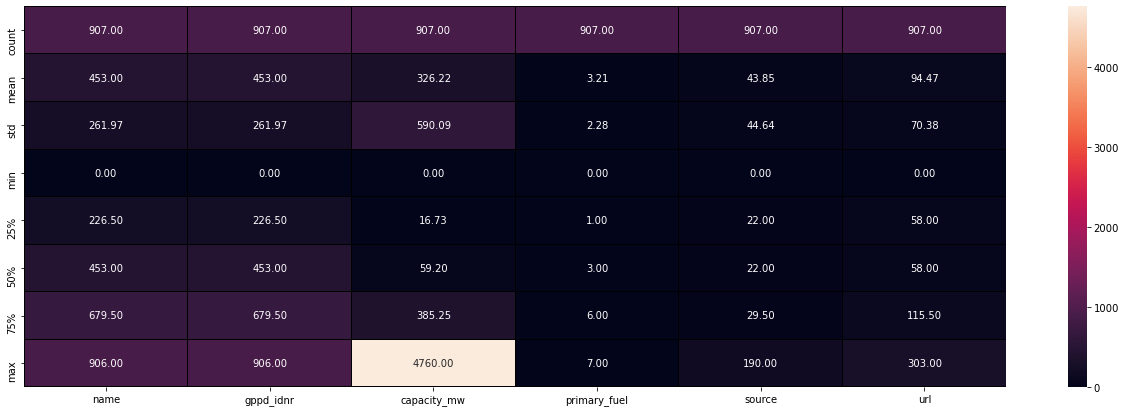

In [329]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [330]:
df.corr()

,name,gppd_idnr,capacity_mw,primary_fuel,source,url
name,1.000000,0.332205,0.060240,0.040753,-0.014640,0.041917
gppd_idnr,0.332205,1.000000,-0.335742,0.609180,0.416384,0.597080
capacity_mw,0.060240,-0.335742,1.000000,-0.380395,-0.242122,-0.243830
primary_fuel,0.040753,0.609180,-0.380395,1.000000,0.053613,0.589886
source,-0.014640,0.416384,-0.242122,0.053613,1.000000,0.160144
url,0.041917,0.597080,-0.243830,0.589886,0.160144,1.000000


<AxesSubplot:>

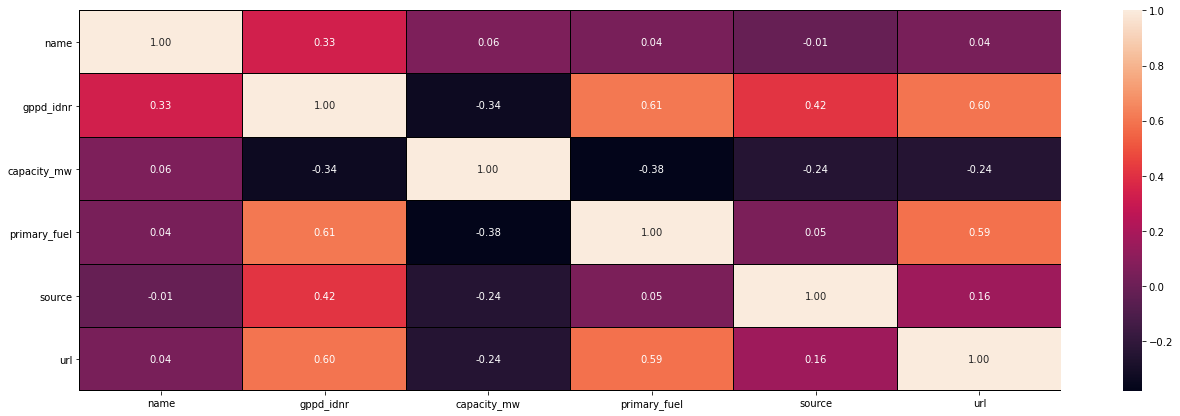

In [331]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

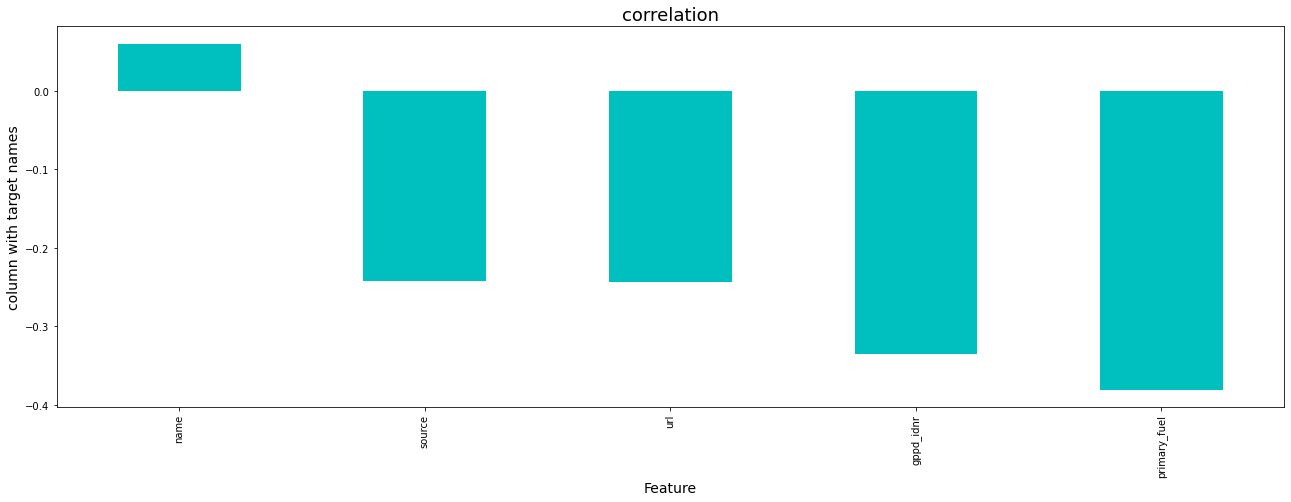

In [332]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

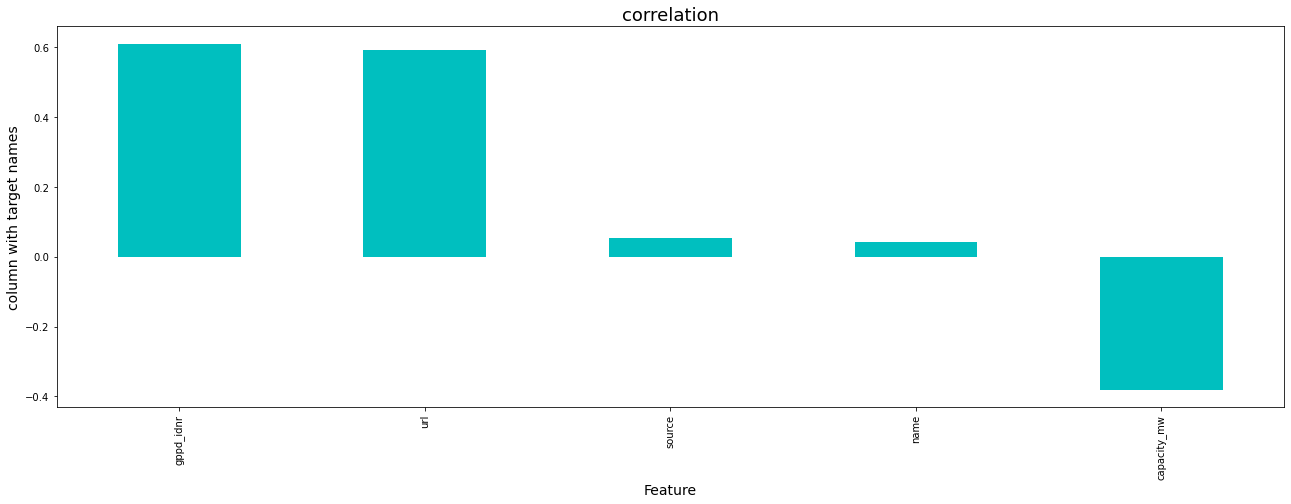

In [333]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [334]:
df.skew()

name            0.000000
gppd_idnr       0.000000
capacity_mw     3.123576
primary_fuel    0.472251
source          1.827373
url             1.510537
dtype: float64

# Outliers Check:

In [335]:
df.dtypes

name            float64
gppd_idnr       float64
capacity_mw     float64
primary_fuel    float64
source          float64
url             float64
dtype: object

<AxesSubplot:>

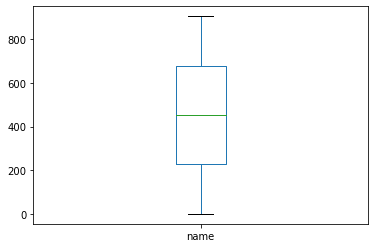

In [337]:
df['name'].plot.box()

<AxesSubplot:>

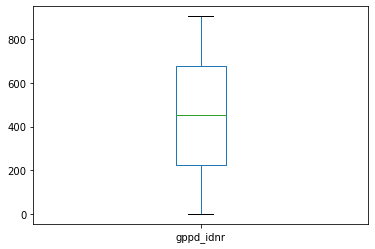

In [338]:
df['gppd_idnr'].plot.box()

<AxesSubplot:>

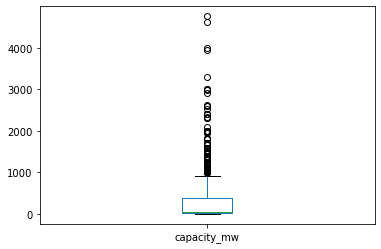

In [339]:
df['capacity_mw'].plot.box()

<AxesSubplot:>

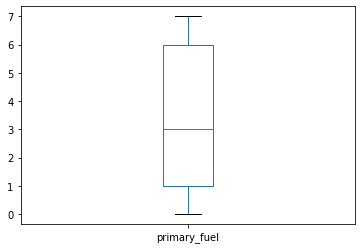

In [340]:
df['primary_fuel'].plot.box()

<AxesSubplot:>

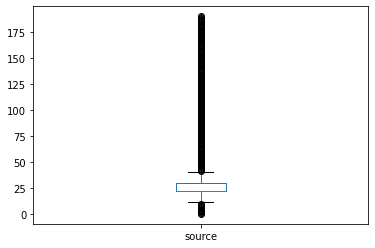

In [341]:
df['source'].plot.box()

<AxesSubplot:>

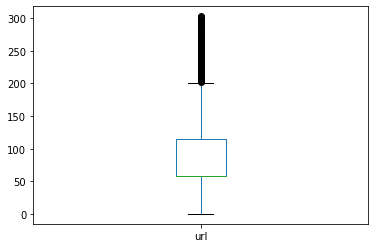

In [342]:
df['url'].plot.box()

# Considering the outlier removal

In [343]:
from scipy.stats import zscore
import numpy as np

In [344]:
z=np.abs(zscore(df))
df.shape

(907, 6)

In [345]:
threshold=3
print(np.where(z>3))

(array([ 15,  71,  80, 143, 147, 191, 209, 299, 308, 321, 345, 363, 364,
       375, 482, 493, 494, 648, 657, 661, 669, 689, 695, 726, 767, 786,
       788, 808, 832, 870, 871, 879, 880, 895, 900], dtype=int64), array([2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4], dtype=int64))


In [346]:
len(np.where(z>3)[0])

35

In [347]:
df_new=df[(z<3)]
df_new

,name,gppd_idnr,capacity_mw,primary_fuel,source,url
0,0.0,657.0,2.5,6.0,109.0,128.0
0,0.0,657.0,2.5,6.0,109.0,128.0
0,0.0,657.0,2.5,6.0,109.0,128.0
0,0.0,657.0,2.5,6.0,109.0,128.0
0,0.0,657.0,2.5,6.0,109.0,128.0
...,...,...,...,...,...,...
906,906.0,876.0,16.5,7.0,21.0,245.0
906,906.0,876.0,16.5,7.0,21.0,245.0
906,906.0,876.0,16.5,7.0,21.0,245.0
906,906.0,876.0,16.5,7.0,21.0,245.0


In [348]:
df_new.shape

(5407, 6)

In [349]:
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe", df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows", df.shape[0]-df_new.shape[0])

Old Dataframe (907, 6)
New Dataframe (872, 6)
total_dropped_rows 35


In [350]:
loss_percent=(907-872)/907*100
loss_percent

3.8588754134509373

# Separating the columns into features and target:

In [373]:
features=df_new.drop("capacity_mw",axis=1)
target=df_new["capacity_mw"]

In [374]:
features=df_new.drop("primary_fuel",axis=1)
target=df_new["primary_fuel"]

# Scaling the data using Min-Max Scaler:

In [375]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [376]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the testing accuracy is:- 0.5382195332034398
At random state 0, the testing accuracy is:- 0.5682544111417436


At random state 1, the testing accuracy is:- 0.5500721828401287
At random state 1, the testing accuracy is:- 0.5187763318922889


At random state 2, the testing accuracy is:- 0.5400120791407257
At random state 2, the testing accuracy is:- 0.5560405059241144


At random state 3, the testing accuracy is:- 0.5493025175290538
At random state 3, the testing accuracy is:- 0.5182242715406976


At random state 4, the testing accuracy is:- 0.5456080983724263
At random state 4, the testing accuracy is:- 0.5349629532933255


At random state 5, the testing accuracy is:- 0.5449883106118119
At random state 5, the testing accuracy is:- 0.5368801729994308


At random state 6, the testing accuracy is:- 0.5192039219511284
At random state 6, the testing accuracy is:- 0.6232647613810188


At random state 7, the testing accuracy is:- 0.5378235489002572
At random state 7, the tes

In [377]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [378]:
lr.fit(features_train,target_train)

LinearRegression()

In [379]:
pred_test=lr.predict(features_test)

In [380]:
print(r2_score(target_test,pred_test))

0.5616998136800293


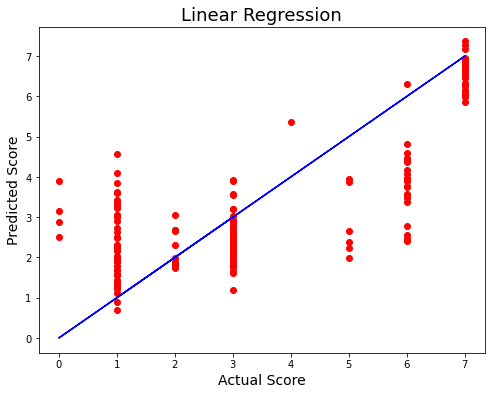

In [381]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test, color='b')
plt.xlabel('Actual Score',fontsize=14)
plt.ylabel('Predicted Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization:

In [382]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [383]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [384]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.5639938274574656

In [385]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5087933885969674

# Ensemble technique:

In [386]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [387]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross val Score:',rfc*100)

R2 Score: 85.99403631700508
Cross val Score: 85.75574584751656


# Model Selection

linear regression

In [388]:
X=df_new.iloc[:,1:14]
y=df_new['capacity_mw']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [389]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [390]:
pred=lr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.6636089331508889e-13
MSE: 4.507754175074333e-26
RMSE: 2.1231472334895508e-13


# y_test vs predictions

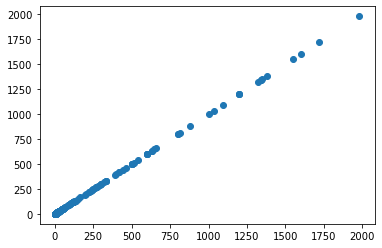

In [391]:
plt.scatter(x=y_test,y=pred)

# Decision Tree Regression Model

In [392]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

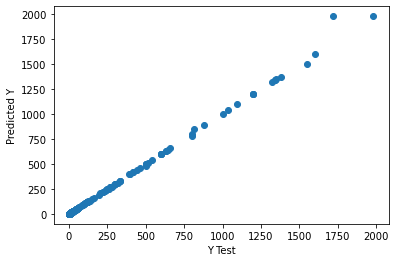

In [393]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [394]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.830194285714285
MSE: 417.7270535771429
RMSE: 20.438372087256433


# Random Forest Regressor

In [395]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [396]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.137655028571433
MSE: 20.875118510279542
RMSE: 4.56892968979383


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

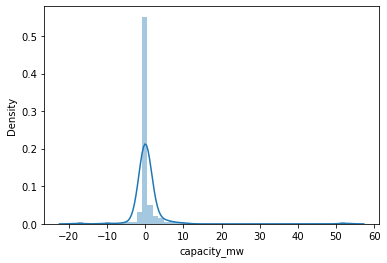

In [397]:
sns.distplot((y_test-pred),bins=50)

# Actual Vs Predicted sample

,Y Test,Pred
822,300.0,299.60000
329,195.0,194.09555
396,5.0,5.00000
806,60.0,60.00000
436,2.1,2.06700


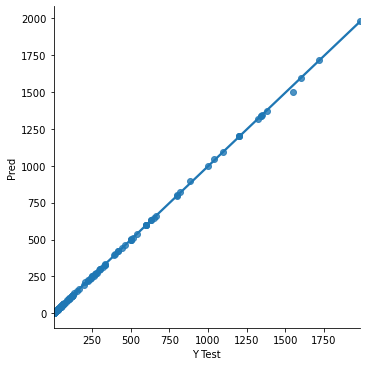

In [399]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Conclusions

learnt about EDA function through Pandas and other plotting libraries.

used matplotlib, plotly and seaborn to develop better insights about the data.

preproceesing helps in dealing with missing values and irregualities present in the data.

Analyzed which model will be work with better accuracy with the help of low residual and RMSE scores.

used Linear, Decision Tree and other applicable and required models to get best predictions.